Task 1: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. Requirements: • Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. • Group the data by sku_name and category, and sum the qty_ordered for each product. • Rank the products based on their total sales quantity in descending order. • Display the top 5 products with the highest sales quantities. • Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities)

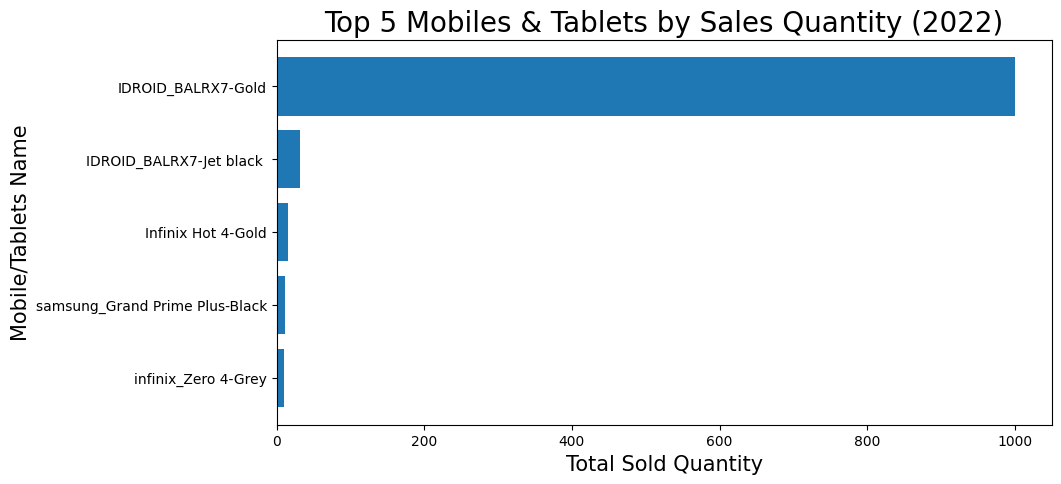

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")

filtered_df = df[
    (df['category'] == 'Mobiles & Tablets') &
    (pd.to_datetime(df['order_date']).dt.year == 2022) &
    (df['is_valid'] == 1)
]

grouped_df = (
    filtered_df.groupby(['sku_name', 'category'])['qty_ordered']
    .sum()
    .reset_index()
    .sort_values(by='qty_ordered', ascending=False)
)

top5_df = grouped_df.head(5)
plt.figure(figsize=(10,5))
plt.barh(top5_df['sku_name'], top5_df['qty_ordered'])
plt.xlabel('Total Sold Quantity',size=15)
plt.ylabel('Mobile/Tablets Name',size=15)
plt.title('Top 5 Mobiles & Tablets by Sales Quantity (2022)',size=20)
plt.gca().invert_yaxis()
plt.show()
